## Understanding Seasonality in Sea Ice in the Arctic 
__Attributes:__
> long_name:     Ice Fraction for ecosys fluxes

> units:         fraction

> grid_loc:      2110

> cell_methods:  time: mean


In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy

from cartopy.util import add_cyclic_point
from mpl_toolkits.basemap import Basemap

In [2]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [4]:
print('What is the new file? (new_file)')
new_file = input('')
print('What year? (year)')
year = input('')

What is the new file? (new_file)


 GNG595


What year? (year)


 20yrclim


In [5]:
### 20 year climatology GNG513b from 43 to 62 representing Jan 1990 - Dec 2009. 
newNCDFfiles = sorted(glob.glob('/glade/scratch/gabyn/GNG595_clim/*', recursive=True),
                      key=numericalSort)
# open dataset 
ds = xr.open_mfdataset(newNCDFfiles,combine='by_coords')

OSError: no files to open

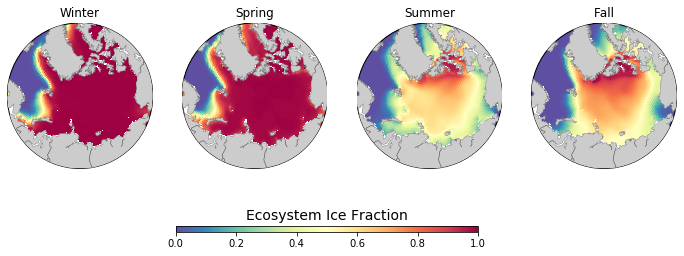

In [7]:
fig = plt.figure(figsize=(12,4))

# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer, cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(ds.ECOSYS_IFRAC[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap='Spectral_r', vmin=0, vmax=1)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('Ecosystem Ice Fraction', fontsize = 14)
m.plot
plt.show()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Ecosys_IceFrac_Seasonal'+year+'_year.png', dpi=600, bbox_inches='tight')

In [33]:
ds.nsurface_u

<xarray.DataArray 'nsurface_u' (time: 12)>
array([82966., 82966., 82966., 82966., 82966., 82966., 82966., 82966.,
       82966., 82966., 82966., 82966.])
Coordinates:
  * time     (time) object 0041-02-01 00:00:00 ... 0042-01-01 00:00:00
Attributes:
    long_name:  Number of Ocean U Points at Surface

In [35]:
ds

<xarray.Dataset>
Dimensions:                           (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 12, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    ULONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    transport_regions                 (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
    TLAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    transport_components              (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
    ULAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_w_top                           (z_w_top) float32 0.0 1000.0 ... 525000.94
  * lat_aux_grid            

## Now we want to find a spot in the Arctic that has thick sea ice during the full year, and have profiles for light and phytoplankton production throughout the water column

In [7]:
ice_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_'+new_file+'_ECOSYS_IFRAC.*.nc', recursive=True))
ice_ds = xr.open_mfdataset(ice_inds,combine='by_coords')

In [8]:
ice_ds.ECOSYS_IFRAC

<xarray.DataArray 'ECOSYS_IFRAC' (time: 12, lat: 180, lon: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360)>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * time     (time) object 0104-02-01 00:00:00 ... 0105-01-01 00:00:00
Attributes:
    long_name:     Ice Fraction for ecosys fluxes
    units:         fraction
    grid_loc:      2110
    cell_methods:  time: mean

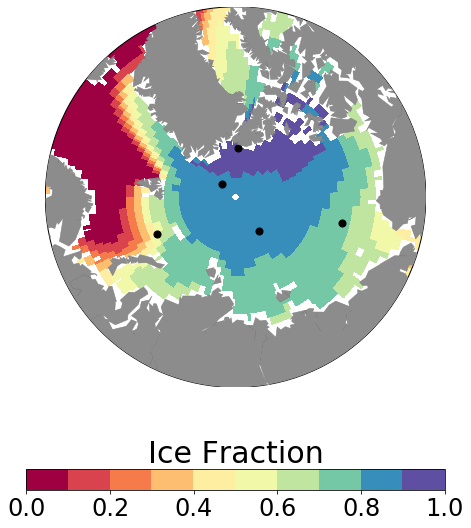

In [9]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(10, 10))
lat = ice_ds.lat
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
ice, lon = add_cyclic_point(np.nanmean(ice_ds.ECOSYS_IFRAC,axis=0), coord=ice_ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,lat))
cf = m.pcolormesh(x,y,ice,shading='flat',cmap=plt.cm.get_cmap('Spectral', 10),vmin = 0, vmax=1) 
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.55', lake_color=None, ax=None, zorder=None, alpha=None)
cb = plt.colorbar(cf,shrink=0.75, orientation='horizontal')
cb.ax.set_title('Ice Fraction', fontsize = 30)
cb.ax.tick_params(labelsize=24)

# make up some data for scatter plot
lats = [87.5,78.5,83.5, 75.5, 84.5];
lons = [-20,50, -68, -169, 150];
x,y = m(lons, lats) # transform coordinates 
plt.scatter(x,y,50,marker='o', color='Black'); 


## Find the indeces for those latitudes and longitudes

In [11]:
lats = [87.5,78.5,84.5, 75.5, 84.5];
lons = [-20,50, -80, -169, 150];

# longitude in degrees East
AO_lon1 = np.where(ice_ds.lon == -20)
AO_lon2 = np.where(ice_ds.lon == 50)
AO_lon3 = np.where(ice_ds.lon == -70)
AO_lon4 = np.where(ice_ds.lon == -169)
AO_lon5 = np.where(ice_ds.lon == 150)
# Latitude degrees_north
AO_lat1 = np.where(ice_ds.lat == 87.5) # The one closes to the arctic circle
AO_lat2 = np.where(ice_ds.lat == 83.5) # The one far away close to the red 
AO_lat3 = np.where(ice_ds.lat == 83.5) # The one under the most ice 
AO_lat4 = np.where(ice_ds.lat == 75.5) # The one far away cose to green. 
AO_lat5 = np.where(ice_ds.lat == 84.5) # The one similar to 1 in ice thickness

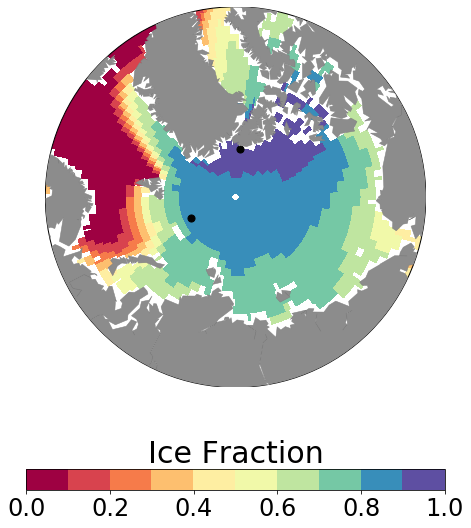

In [10]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(10, 10))
lat = ice_ds.lat
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
ice, lon = add_cyclic_point(np.nanmean(ice_ds.ECOSYS_IFRAC,axis=0), coord=ice_ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,lat))
cf = m.pcolormesh(x,y,ice,shading='flat',cmap=plt.cm.get_cmap('Spectral', 10),vmin = 0, vmax=1) 
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.55', lake_color=None, ax=None, zorder=None, alpha=None)
cb = plt.colorbar(cf,shrink=0.75, orientation='horizontal')
cb.ax.set_title('Ice Fraction', fontsize = 30)
cb.ax.tick_params(labelsize=24)

# make up some data for scatter plot
lats = [83.5,83.5];
lons = [50, -70];
x,y = m(lons, lats) # transform coordinates 
plt.scatter(x,y,50,marker='o', color='Black'); 
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/ice_fraction_AO_'+year+'year.png', dpi=600, bbox_inches='tight')

In [15]:
AO_lon2[0]

array([230])

In [14]:
AO_lat2[0]

array([173])

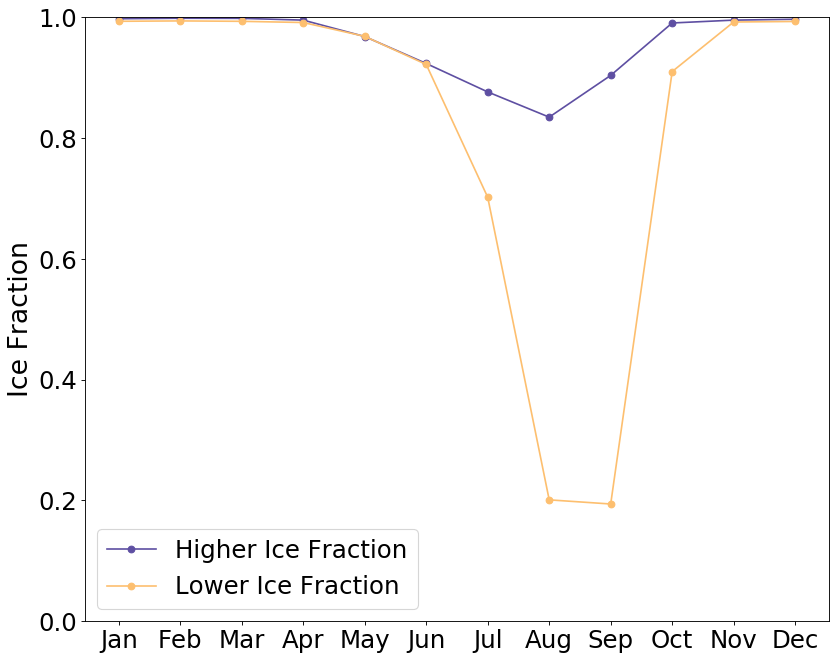

In [16]:
import matplotlib
cmap=matplotlib.cm.get_cmap('Spectral', 10)

months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(months,ice_ds.ECOSYS_IFRAC[:,173, 110], '-o', color=cmap(9),label='Higher Ice Fraction')
pylab.plot(months,ice_ds.ECOSYS_IFRAC[:,173, 230], '-o', color=cmap(3),label='Lower Ice Fraction')

pylab.legend(loc='lower left', fontsize=22)
pylab.ylim([0,1])
pylab.ylabel('Ice Fraction', fontsize=24)
plt.yticks(fontsize=22);plt.xticks(fontsize=22)
pylab.show()

fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/ice_thickness_motnhly'+year+'year.png', dpi=600, bbox_inches='tight')

## Light depth profile

In [18]:
par_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_2ndcycle_20year_clim_remap/regrid_'+new_file+'_PAR_avg.*.nc', recursive=True))
par_ds = xr.open_mfdataset(par_inds,combine='by_coords')

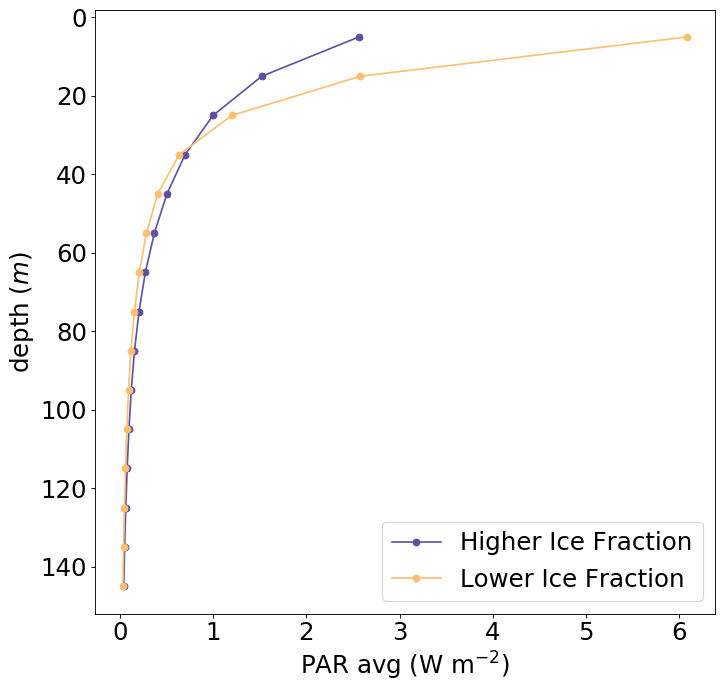

In [19]:
import matplotlib
cmap=matplotlib.cm.get_cmap('Spectral', 10)
fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(np.nanmean(par_ds.PAR_avg[:,:,173,110],axis=0),par_ds.z_t_150m/100, '-o', color=cmap(9),label='Higher Ice Fraction')
pylab.plot(np.nanmean(par_ds.PAR_avg[:,:,173,230],axis=0),par_ds.z_t_150m/100, '-o',color=cmap(3),label='Lower Ice Fraction')


pylab.legend(loc='lower right', fontsize=22)
pylab.ylabel('depth ($m$)', fontsize=22)
pylab.xlabel('PAR avg (W m$^{-2}$)', fontsize=22)
plt.yticks(fontsize= 22);plt.xticks(fontsize= 22);
pylab.gca().invert_yaxis()
pylab.show()
fig.tight_layout()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/PAR_avg_depth_profile'+year+'year.png', dpi=600, bbox_inches='tight')

## Now Let's check between the difference in September compared to March, and with this general averaged one

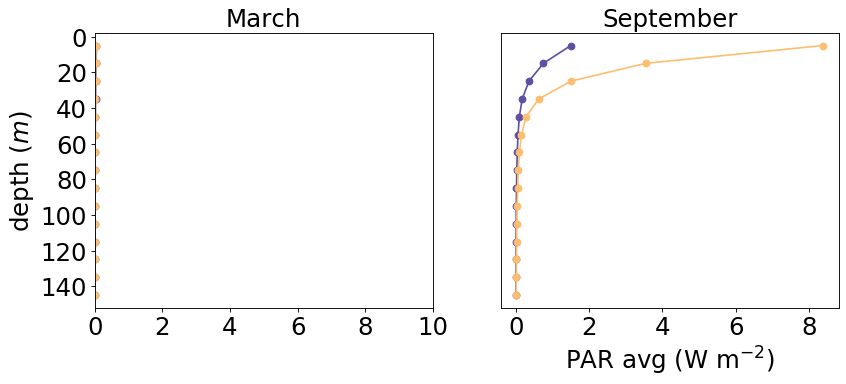

In [24]:
cmap=matplotlib.cm.get_cmap('Spectral', 10)
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(2, 2, 1)
pylab.plot(par_ds.PAR_avg[2,:,173,110],par_ds.z_t_150m/100, '-o', color=cmap(9),label='Higher Ice Fraction')
pylab.plot(par_ds.PAR_avg[2,:,173,230],par_ds.z_t_150m/100, '-o',color=cmap(3),label='Lower Ice Fraction')
#pylab.legend(loc='lower right', fontsize=22)
pylab.ylabel('depth ($m$)', fontsize=22)
pylab.title('March', fontsize=22)
#pylab.xlabel('PAR avg (W m$^{-2}$)', fontsize=22)
plt.yticks(fontsize= 22);
plt.xlim([0,10])
plt.xticks([0,2,4,6,8,10],fontsize= 22);
pylab.gca().invert_yaxis()

ax = fig.add_subplot(2, 2, 2)
pylab.plot(par_ds.PAR_avg[8,:,173,110],par_ds.z_t_150m/100, '-o', color=cmap(9),label='Ice Thick')
pylab.plot(par_ds.PAR_avg[8,:,173,230],par_ds.z_t_150m/100, '-o',color=cmap(3),label='Ice Free')
pylab.title('September', fontsize=22)
pylab.xlabel('PAR avg (W m$^{-2}$)', fontsize=22)
plt.xticks(fontsize= 22);
plt.tick_params(
    axis='y',      
    left=False,
    labelleft =False)      
pylab.gca().invert_yaxis()

#ax = fig.add_subplot(3, 3, 3)
#pylab.plot(np.nanmean(par_ds.PAR_avg[:,:,173,110],axis=0),par_ds.z_t_150m/100, '-o', color=cmap(9),label='Ice Thick')
#pylab.plot(np.nanmean(par_ds.PAR_avg[:,:,173,230],axis=0),par_ds.z_t_150m/100, '-o',color=cmap(3),label='Ice Free')
#pylab.legend(loc='lower right', fontsize=10)
#pylab.title('Annual', fontsize=22)
#pylab.xlabel('PAR avg (W m$^{-2}$)', fontsize=22)
#plt.xlim([0,10])
#plt.xticks([0,2,4,6,8,10],fontsize= 22);
#plt.xticks(fontsize= 22);
#plt.tick_params(
#    axis='y',      
#    left=False,
#    labelleft =False)      
#pylab.gca().invert_yaxis()


pylab.show()
fig.tight_layout()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/PAR_avg_depth_profile_MSA_'+year+'year.png', dpi=600, bbox_inches='tight')

## Primary Production 

In [25]:
ppC_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_ppC.*.nc', recursive=True))
ppC_ds = xr.open_mfdataset(ppC_inds,combine='by_coords')
mp1C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp1C.*.nc', recursive=True))
mp1C_ds = xr.open_mfdataset(mp1C_inds,combine='by_coords')
mp2C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp2C.*.nc', recursive=True))
mp2C_ds = xr.open_mfdataset(mp2C_inds,combine='by_coords')
mp3C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp3C.*.nc', recursive=True))
mp3C_ds = xr.open_mfdataset(mp3C_inds,combine='by_coords')
mp4C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_mp4C.*.nc', recursive=True))
mp4C_ds = xr.open_mfdataset(mp4C_inds,combine='by_coords')
diazC_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diazC.*.nc', recursive=True))
diazC_ds = xr.open_mfdataset(diazC_inds,combine='by_coords')
diat1C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diat1C.*.nc', recursive=True))
diat1C_ds = xr.open_mfdataset(diat1C_inds,combine='by_coords')
diat2C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diat2C.*.nc', recursive=True))
diat2C_ds = xr.open_mfdataset(diat2C_inds,combine='by_coords')
diat3C_inds = sorted(glob.glob('/glade/scratch/gabyn/GNG595_20yrclim/regrid_GNG595_diat3C.*.nc', recursive=True))
diat3C_ds = xr.open_mfdataset(diat3C_inds,combine='by_coords')

In [26]:
phytoC = np.stack([ppC_ds.ppC, mp1C_ds.mp1C, diazC_ds.diazC, 
                               mp2C_ds.mp2C, diat1C_ds.diat1C, diat2C_ds.diat2C, 
                               mp3C_ds.mp3C, diat3C_ds.diat3C, mp4C_ds.mp4C]) # mmol/m^3
phytoC_bm = np.sum(phytoC, axis=0) # mmol/m^3

In [27]:
phytoC_bm.shape

(12, 15, 180, 360)

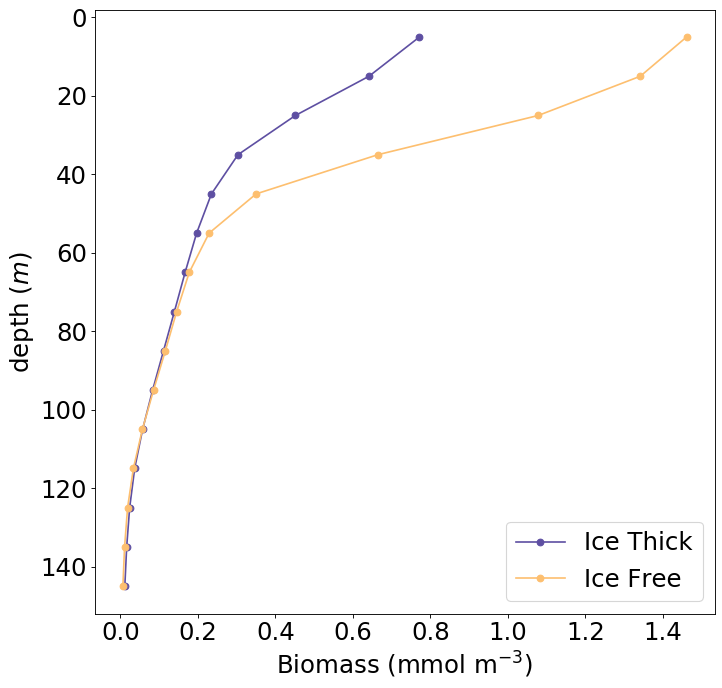

In [28]:
import matplotlib
cmap=matplotlib.cm.get_cmap('Spectral', 10)
fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(np.nanmean(phytoC_bm[:,:,173,110],axis=0),par_ds.z_t_150m/100, '-o', color=cmap(9),label='Ice Thick')
pylab.plot(np.nanmean(phytoC_bm[:,:,173,230],axis=0),par_ds.z_t_150m/100, '-o',color=cmap(3),label='Ice Free')


pylab.legend(loc='lower right', fontsize=22)
pylab.ylabel('depth ($m$)', fontsize=22)
pylab.xlabel('Biomass (mmol m$^{-3}$)', fontsize=22)
plt.yticks(fontsize= 22);plt.xticks(fontsize= 22);
pylab.gca().invert_yaxis()
pylab.show()
fig.tight_layout()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Biomass_depth_profile'+year+'year.png', dpi=600, bbox_inches='tight')

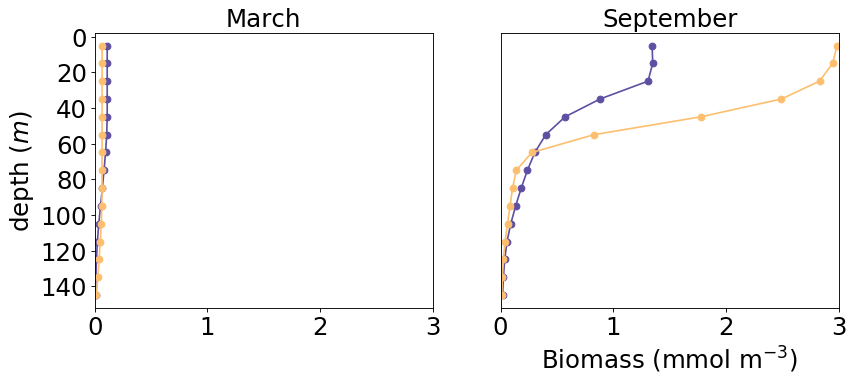

In [29]:
cmap=matplotlib.cm.get_cmap('Spectral', 10)
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(2, 2, 1)
pylab.plot(phytoC_bm[2,:,173,110],par_ds.z_t_150m/100, '-o', color=cmap(9),label='Ice Thick')
pylab.plot(phytoC_bm[2,:,168,230],par_ds.z_t_150m/100, '-o',color=cmap(3),label='Ice Free')
#pylab.legend(loc='lower right', fontsize=22)
pylab.ylabel('depth ($m$)', fontsize=22)
pylab.title('March', fontsize=22)
#pylab.xlabel('Biomass (mmol m$^{-3}$)', fontsize=22)
plt.yticks(fontsize= 22);plt.xticks(fontsize= 22);
plt.xlim([0,3])
plt.xticks([0,1,2,3],fontsize= 22);
pylab.gca().invert_yaxis()

ax = fig.add_subplot(2, 2, 2)
pylab.plot(phytoC_bm[8,:,173,110],par_ds.z_t_150m/100, '-o', color=cmap(9),label='Ice Thick')
pylab.plot(phytoC_bm[8,:,168,230],par_ds.z_t_150m/100, '-o',color=cmap(3),label='Ice Free')
pylab.title('September', fontsize=22)
pylab.xlabel('Biomass (mmol m$^{-3}$)', fontsize=22)
plt.xticks(fontsize= 22);
plt.xlim([0,3])
plt.xticks([0,1,2,3],fontsize= 22);
plt.tick_params(
    axis='y',      
    left=False,
    labelleft =False)      
pylab.gca().invert_yaxis()

#ax = fig.add_subplot(2, 2, 3)
#pylab.plot(np.nanmean(phytoC_bm[:,:,173,110],axis=0),par_ds.z_t_150m/100, '-o', color=cmap(9),label='Ice Thick')
#pylab.plot(np.nanmean(phytoC_bm[:,:,168,230],axis=0),par_ds.z_t_150m/100, '-o',color=cmap(3),label='Ice Free')
#pylab.legend(loc='lower right', fontsize=10)
#pylab.title('Annual', fontsize=22)
#pylab.xlabel('Biomass (mmol m$^{-3}$)', fontsize=22)
#plt.xlim([0,3])
#plt.xticks([0,1,2,3],fontsize= 22);
#plt.tick_params(
#    axis='y',      
#    left=False,
#    labelleft =False)      
#pylab.gca().invert_yaxis()


pylab.show()
fig.tight_layout()
fig.savefig('/glade/u/home/gabyn/case_notes/analysis_figures/'+new_file+'/Biomass_depth_profile_MSA_'+year+'year.png', dpi=600, bbox_inches='tight')